# This contains my visualization and summary statistics for Deaths Involving COVID-19 by Vaccination Status

In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
data = pd.read_csv("2aa6e2ce-40de-4910-a737-81762e014b0b.csv")
all_cases = pd.read_csv("2aa6e2ce-40de-4910-a737-81762e014b0b.csv")
data.head()

,_id,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,1,2021-03-01T00:00:00,0-4yrs,0.0,0.0,0.00
1,2,2021-03-01T00:00:00,5-11yrs,0.0,0.0,0.00
2,3,2021-03-01T00:00:00,12-17yrs,0.0,0.0,0.00
3,4,2021-03-01T00:00:00,18-39yrs,0.0,0.0,0.00
4,5,2021-03-01T00:00:00,40-59yrs,0.0,0.0,0.02


In [36]:
all_cases.describe()

,_id,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,6979.000000,6979.000000,6979.000000,6979.000000
mean,3490.000000,0.027371,0.028963,0.310238
std,2014.808097,0.074539,0.122333,1.354945
min,1.000000,0.000000,0.000000,0.000000
25%,1745.500000,0.000000,0.000000,0.000000
50%,3490.000000,0.000000,0.000000,0.000000
75%,5234.500000,0.010000,0.010000,0.050000
max,6979.000000,0.810000,1.970000,18.330000


In [37]:
all_cases = all_cases.drop(columns=['_id', 'date', 'deaths_full_vac_rate_7ma', 'deaths_boost_vac_rate_7ma'])
all_cases.head()

,age_group,deaths_not_full_vac_rate_7ma
0,0-4yrs,0.00
1,5-11yrs,0.00
2,12-17yrs,0.00
3,18-39yrs,0.00
4,40-59yrs,0.02


In [50]:
all_cases = all_cases.loc[all_cases['deaths_not_full_vac_rate_7ma'] > 0.00]
all_cases.head()

,age_group,deaths_not_full_vac_rate_7ma
4,40-59yrs,0.02
5,60+,0.35
6,ALL,0.09
11,40-59yrs,0.04
12,60+,0.34


In [52]:
all_cases['age_group'].value_counts()

age_group
ALL         933
60+         931
40-59yrs    591
18-39yrs    273
0-4yrs       63
5-11yrs      21
12-17yrs     21
Name: count, dtype: int64

<Axes: xlabel='age_group'>

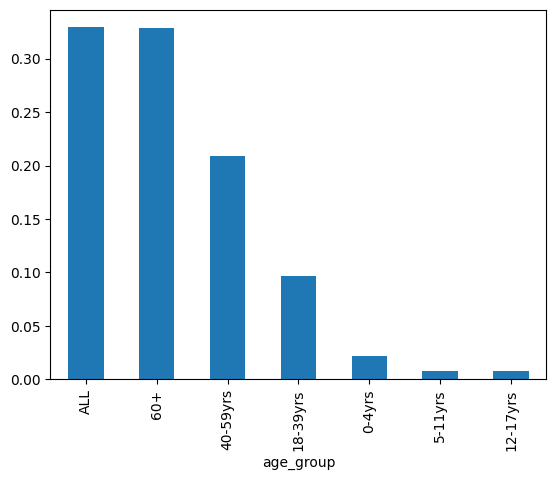

In [55]:
all_cases['age_group'].value_counts(normalize=True).plot(kind='bar')

In [67]:
all_cases = pd.read_csv("2aa6e2ce-40de-4910-a737-81762e014b0b.csv")
boost_cases = all_cases.loc[all_cases.deaths_boost_vac_rate_7ma > 0]
boost_cases = boost_cases.drop(columns=['_id', 'date', 'deaths_full_vac_rate_7ma', 'deaths_not_full_vac_rate_7ma'])
boost_cases.head()

,age_group,deaths_boost_vac_rate_7ma
1594,60+,0.19
1595,ALL,0.15
1601,60+,0.19
1602,ALL,0.15
1608,60+,0.19


boost_cases['age_group'].value_counts()

#### I used the dataset to compare deaths by age group between not fully vaccinated and those who have recieved a booster.
#### As evidenced by the data the amount deaths decreases by age group (expect 0-4 years old was slightly higher than 5-11 and 12-17yrs), however deaths for those who have the booster are a lot less than those who are not fully vaccinated